<a href="https://colab.research.google.com/github/Aashi019903/Collab_Project-/blob/main/3D_Printer_Material_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3D Printer Material Prediction Using Machine learning:

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 3D Printer Dataset.csv to 3D Printer Dataset.csv


1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


2.  Load the Dataset

In [ ]:
# Load the CSV file
df = pd.read_csv('3D Printer Dataset.csv')

In [ ]:
# Show first 5 rows
df.head()


,Layer_height_mm,Infill_density_%,Infill_pattern,Bed_temperature_C,Print_speed_mm_s,Material,Fan_speed_m_s,Nozzle_diameter_mm,Build_volume_cm3,Filament_type,Filament_diameter_mm,Melting_temperature_C,Retraction_distance_mm,Retraction_speed_mm_s,Flow_rate_%,Acceleration_mm_s2,Linear_advance,Loading_rate_N_s,Microstructure,Material_type
0,0.04,40,Honey comb,71,40,abs,75,0.2,1123,ABS,2.85,215,2.18,23,100,2331,0.49,34,coarse,composite
1,0.06,70,grid,81,40,pla,100,0.4,1069,PETG,1.75,191,3.89,58,93,1761,0.79,15,fine,composite
2,0.02,40,Honey comb,80,40,abs,100,0.2,2038,PETG,1.75,208,4.62,20,101,962,0.71,44,fine,composite
3,0.02,40,Honey comb,71,40,pla,50,0.4,2326,PLA,1.75,240,3.54,27,103,1978,0.64,26,fine,composite
4,0.06,70,Honey comb,78,40,pla,25,0.6,1786,ABS,1.75,221,5.00,38,94,1661,0.73,42,coarse,composite


3. Explore the Dataset

In [ ]:
# Dataset Info

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Layer_height_mm         50 non-null     float64
 1   Infill_density_%        50 non-null     int64  
 2   Infill_pattern          50 non-null     int64  
 3   Bed_temperature_C       50 non-null     int64  
 4   Print_speed_mm_s        50 non-null     int64  
 5   Material                50 non-null     int64  
 6   Fan_speed_m_s           50 non-null     int64  
 7   Nozzle_diameter_mm      50 non-null     float64
 8   Build_volume_cm3        50 non-null     int64  
 9   Filament_type           50 non-null     int64  
 10  Filament_diameter_mm    50 non-null     float64
 11  Melting_temperature_C   50 non-null     int64  
 12  Retraction_distance_mm  50 non-null     float64
 13  Retraction_speed_mm_s   50 non-null     int64  
 14  Flow_rate_%             50 non-null     int6

In [ ]:
# Check for null values

print(df.isnull().sum())


Layer_height_mm           0
Infill_density_%          0
Infill_pattern            0
Bed_temperature_C         0
Print_speed_mm_s          0
Material                  0
Fan_speed_m_s             0
Nozzle_diameter_mm        0
Build_volume_cm3          0
Filament_type             0
Filament_diameter_mm      0
Melting_temperature_C     0
Retraction_distance_mm    0
Retraction_speed_mm_s     0
Flow_rate_%               0
Acceleration_mm_s2        0
Linear_advance            0
Loading_rate_N_s          0
Microstructure            0
Material_type             0
dtype: int64


In [ ]:
# Check unique values

print(df.nunique())

Layer_height_mm            3
Infill_density_%           4
Infill_pattern             2
Bed_temperature_C         23
Print_speed_mm_s           1
Material                   2
Fan_speed_m_s              5
Nozzle_diameter_mm         3
Build_volume_cm3          50
Filament_type              3
Filament_diameter_mm       2
Melting_temperature_C     40
Retraction_distance_mm    47
Retraction_speed_mm_s     30
Flow_rate_%               18
Acceleration_mm_s2        50
Linear_advance            38
Loading_rate_N_s          29
Microstructure             2
Material_type              2
dtype: int64


In [ ]:
# Quick statistics

df.describe()

,Layer_height_mm,Infill_density_%,Infill_pattern,Bed_temperature_C,Print_speed_mm_s,Material,Fan_speed_m_s,Nozzle_diameter_mm,Build_volume_cm3,Filament_type,Filament_diameter_mm,Melting_temperature_C,Retraction_distance_mm,Retraction_speed_mm_s,Flow_rate_%,Acceleration_mm_s2,Linear_advance,Loading_rate_N_s,Microstructure,Material_type
count,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000
mean,0.041600,54.800000,0.580000,72.980000,40.0,0.460000,49.500000,0.420000,1958.580000,1.06000,2.212000,213.400000,3.476200,38.280000,99.860000,1849.42000,0.541400,28.00000,0.520000,0.580000
std,0.016081,29.363312,0.498569,7.369241,0.0,0.503457,35.888859,0.162882,543.753549,0.86685,0.548426,20.699995,1.413213,12.121898,5.333797,728.05559,0.245174,10.66369,0.504672,0.498569
min,0.020000,10.000000,0.000000,61.000000,40.0,0.000000,0.000000,0.200000,1069.000000,0.00000,1.750000,180.000000,1.310000,20.000000,90.000000,523.00000,0.170000,12.00000,0.000000,0.000000
25%,0.020000,40.000000,0.000000,67.250000,40.0,0.000000,25.000000,0.200000,1569.000000,0.00000,1.750000,196.750000,2.245000,26.250000,96.000000,1289.50000,0.330000,20.25000,0.000000,0.000000
50%,0.040000,70.000000,1.000000,72.500000,40.0,0.000000,50.000000,0.400000,1966.000000,1.00000,1.750000,214.500000,3.380000,38.000000,100.000000,1982.50000,0.555000,26.00000,1.000000,1.000000
75%,0.060000,85.000000,1.000000,79.750000,40.0,1.000000,75.000000,0.600000,2347.750000,2.00000,2.850000,228.750000,4.740000,47.000000,105.000000,2457.00000,0.707500,36.75000,1.000000,1.000000
max,0.060000,90.000000,1.000000,84.000000,40.0,1.000000,100.000000,0.600000,2970.000000,2.00000,2.850000,249.000000,5.940000,59.000000,109.000000,2880.00000,1.000000,49.00000,1.000000,1.000000


 4. Preprocess the Data

In [ ]:
# Encoding categorical variables if needed
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


5. Define Features and Target,

Assuming the target is a column like Material_Type (adjust based on the real column name):

In [ ]:
X = df.drop('Material_type', axis=1)   # Features
y = df['Material_type']                # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Train a Machine Learning Model

In [ ]:
# Use Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

7.  Evaluate the Model

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.80      0.50      0.62         8

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.68      0.50      0.55        10



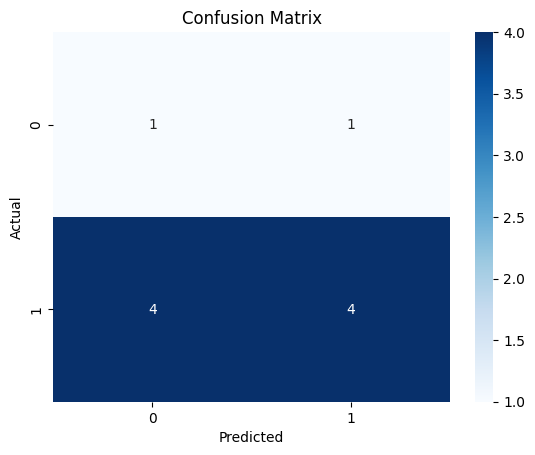

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy & Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


8. Predict New Data (Example)

In [ ]:
# Predict on new unseen data (example: X_test.iloc[0])
sample = X_test.iloc[[0]]
predicted_material = model.predict(sample)

# Decode if needed
predicted_label = label_encoders['Material_type'].inverse_transform(predicted_material)
print("Predicted Material Type:", predicted_label[0])

Predicted Material Type: composite
